# Part 1 - Ford Gobike System Exploration

# By: Solomon Izuchukwu Ajaero

# Introduction

The dataset includes information about individual rides made in a bike sharing system covering the greater San Francisco Bay area.

In [3]:
#import all packages
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import great_circle
sb.set(style = 'whitegrid')
%matplotlib inline
#import geopandas as gpd

In [4]:
ford_gobike = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# Data Wrangling

In [3]:
ford_gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
#calculalte the number missing values in each row of the dataset
ford_gobike.isnull().sum() 

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
ford_gobike.user_type.value_counts() 

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [6]:
ford_gobike.member_birth_year.unique()

array([1984.,   nan, 1972., 1989., 1974., 1959., 1983., 1988., 1992.,
       1996., 1993., 1990., 1981., 1975., 1978., 1991., 1997., 1986.,
       2000., 1982., 1995., 1980., 1973., 1985., 1971., 1979., 1967.,
       1998., 1994., 1977., 1999., 1987., 1969., 1963., 1976., 1964.,
       1965., 1961., 1968., 1966., 1962., 1954., 1958., 1960., 1970.,
       1956., 1957., 1945., 1900., 1952., 1948., 1951., 1941., 1950.,
       1949., 1953., 1955., 1946., 1947., 1931., 1943., 1942., 1920.,
       1933., 2001., 1878., 1901., 1944., 1928., 1934., 1939., 1930.,
       1902., 1910., 1938., 1927.])

In [7]:
ford_gobike.query('member_birth_year == 1901.0')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
29716,403,2019-02-25 06:46:30.4480,2019-02-25 06:53:13.9140,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,3279,Subscriber,1901.0,Male,No
41246,539,2019-02-22 18:46:15.4030,2019-02-22 18:55:15.0530,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,25.0,Howard St at 2nd St,37.787522,-122.397405,5859,Subscriber,1901.0,Male,No
48804,387,2019-02-22 07:01:50.4310,2019-02-22 07:08:18.0800,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5157,Subscriber,1901.0,Male,No
138297,491,2019-02-08 07:44:39.4610,2019-02-08 07:52:51.1400,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5276,Subscriber,1901.0,Male,No
147519,460,2019-02-07 07:44:28.2170,2019-02-07 07:52:08.3900,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,3646,Subscriber,1901.0,Male,No
182830,428,2019-02-01 07:45:05.9340,2019-02-01 07:52:14.9220,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5031,Subscriber,1901.0,Male,No


# Data Cleaning

In [5]:
# drop any row with missing data
ford_gobike = ford_gobike.dropna() 

In [4]:
ford_gobike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [6]:
#convert member birth year to int
ford_gobike['member_birth_year'] = ford_gobike.member_birth_year.astype(int) 

ford_gobike.member_birth_year.unique()

array([1984, 1972, 1989, 1974, 1959, 1983, 1988, 1992, 1996, 1993, 1990,
       1981, 1975, 1978, 1991, 1997, 1986, 2000, 1982, 1995, 1980, 1973,
       1985, 1971, 1979, 1967, 1998, 1994, 1977, 1999, 1987, 1969, 1963,
       1976, 1964, 1965, 1961, 1968, 1966, 1962, 1954, 1958, 1960, 1970,
       1956, 1957, 1945, 1900, 1952, 1948, 1951, 1941, 1950, 1949, 1953,
       1955, 1946, 1947, 1931, 1943, 1942, 1920, 1933, 2001, 1878, 1901,
       1944, 1928, 1934, 1939, 1930, 1902, 1910, 1938, 1927])

In [6]:
ford_gobike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No


In [7]:
ford_gobike['year'] = pd.DatetimeIndex(ford_gobike['start_time']).year #extract year from start
#ford_gobike['end_year'] = pd.DatetimeIndex(ford_gobike['end_time']).year

ford_gobike['start_month'] = pd.DatetimeIndex(ford_gobike['start_time']).month_name() #extract start month from start time
ford_gobike['end_month'] = pd.DatetimeIndex(ford_gobike['end_time']).month_name() #extract end month from end time

ford_gobike['start_day'] = pd.DatetimeIndex(ford_gobike['start_time']).day_name() #extract start day from start time
ford_gobike['end_day'] = pd.DatetimeIndex(ford_gobike['end_time']).day_name() ##extract end day from end time

In [8]:
#extract age from member birth year and start time
ford_gobike['age'] = ford_gobike.year - ford_gobike.member_birth_year 

ford_gobike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,start_month,end_month,start_day,end_day,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,2019,February,March,Thursday,Friday,35
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,2019,February,March,Thursday,Friday,47


In [168]:
ford_gobike.age.unique() #

array([ 35,  47,  30,  45,  60,  36,  31,  27,  23,  26,  29,  38,  44,
        41,  28,  22,  33,  19,  37,  24,  39,  46,  34,  48,  40,  52,
        21,  25,  42,  20,  32,  50,  56,  43,  55,  54,  58,  51,  53,
        57,  65,  61,  59,  49,  63,  62,  74, 119,  67,  71,  68,  78,
        69,  70,  66,  64,  73,  72,  88,  76,  77,  99,  86,  18, 141,
       118,  75,  91,  85,  80,  89, 117, 109,  81,  92], dtype=int64)

In [9]:
#convert duration from seconds to minutes and thereafter, convert the datatype to float
ford_gobike['duration_sec'] = ford_gobike.duration_sec.apply(lambda x: '{:.2f}'.format(x/60))
ford_gobike.rename(columns = {'duration_sec' : 'time_interval_min'}, inplace = True)
ford_gobike['time_interval_min'] = ford_gobike.time_interval_min.astype(float)

In [10]:
#define a function to calculate the distance between two the stations
def distance(df):
    start_station = (df.start_station_latitude, df.start_station_longitude)
    end_station = (df.end_station_latitude, df.end_station_longitude)
    distance = great_circle(start_station, end_station).meters
    return float('{:.2f}'.format(distance))

In [11]:
#apply distance function to start and end stations location
ford_gobike['distance'] = ford_gobike.apply(distance, axis = 'columns')

In [11]:
ford_gobike.head(5)

,time_interval_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,year,start_month,end_month,start_day,end_day,age,distance
0,869.75,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984,Male,No,2019,February,March,Thursday,Friday,35,544.71
2,1030.90,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,2019,February,March,Thursday,Friday,47,2704.55
3,608.17,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989,Other,No,2019,February,March,Thursday,Friday,30,260.74
4,26.42,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,2019,February,March,Thursday,Friday,45,2409.30
5,29.88,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959,Male,No,2019,February,March,Thursday,Friday,60,3332.21


In [166]:
#ford_gobike.day_interval.replace({'1 days' : 1,
 #                                '0 days' : 0}, inplace = True)
#ford_gobike.head(5)

In [15]:
#variation of distance
#ford_gobike.distance.value_counts()

In [12]:
#list of features of interest to support the investigations

ford_gobike_ = ford_gobike[['bike_id', 'user_type', 'member_gender',  'age','start_station_name', 'end_station_name', 'distance',
                            'start_month', 'end_month', 'start_day', 'end_day', 'time_interval_min', 'bike_share_for_all_trip']]
ford_gobike_.head()

,bike_id,user_type,member_gender,age,start_station_name,end_station_name,distance,start_month,end_month,start_day,end_day,time_interval_min,bike_share_for_all_trip
0,4902,Customer,Male,35,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,544.71,February,March,Thursday,Friday,869.75,No
2,5905,Customer,Male,47,Market St at Dolores St,Powell St BART Station (Market St at 4th St),2704.55,February,March,Thursday,Friday,1030.90,No
3,6638,Subscriber,Other,30,Grove St at Masonic Ave,Central Ave at Fell St,260.74,February,March,Thursday,Friday,608.17,No
4,4898,Subscriber,Male,45,Frank H Ogawa Plaza,10th Ave at E 15th St,2409.30,February,March,Thursday,Friday,26.42,Yes
5,5200,Subscriber,Male,60,4th St at Mission Bay Blvd S,Broadway at Kearny,3332.21,February,March,Thursday,Friday,29.88,No


In [12]:
#Structure of dataset
ford_gobike_.shape

(174952, 13)

In [19]:
ford_gobike_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   bike_id                  174952 non-null  int64  
 1   user_type                174952 non-null  object 
 2   member_gender            174952 non-null  object 
 3   age                      174952 non-null  int64  
 4   start_station_name       174952 non-null  object 
 5   end_station_name         174952 non-null  object 
 6   distance                 174952 non-null  float64
 7   start_month              174952 non-null  object 
 8   end_month                174952 non-null  object 
 9   start_day                174952 non-null  object 
 10  end_day                  174952 non-null  object 
 11  time_interval_min        174952 non-null  float64
 12  bike_share_for_all_trip  174952 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 18.7+ MB


# What is the structure of your dataset?

There are 174953 users in the dataset with 13 columns.
Most of the data are categorical in nature.

# What is the main feature of interest in the dataset

I want to understand the variation of the numbers of users of the system across distance, age, time interval and days of the week.

# The features of intersest that would support the investigation

I would running analysis of the number of users. 
So, user_type, member_gender, distance, age, time interval and days of the week would be of interest.

# Exploratory Analysis

In [24]:
#def a function to visualize categorical univariate data
def univariate_cat(var, color):
    base_color = sb.color_palette()[color]
    return sb.countplot(data = ford_gobike_, x = var, color = base_color)

# Who are the major users of the system; Bike sharing System

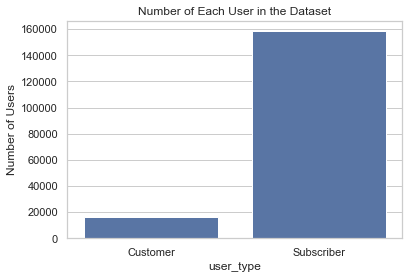

In [26]:
univariate_cat('user_type', 0)
plt.title('Number of Each User in the Dataset')
plt.ylabel('Number of Users');

In [30]:
ford_gobike_.user_type.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'

Subscriber    90.5%
Customer       9.5%
Name: user_type, dtype: object

The above displays show that about 90% of the users is subscribers.
So, I want to check how this changes with respect to their genders.

# Which gender is the highest user of the system

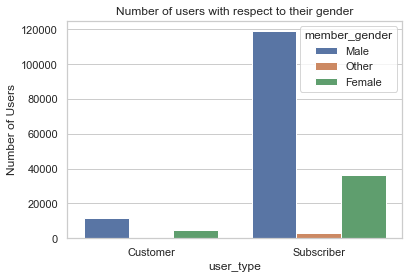

In [31]:
sb.countplot(data = ford_gobike_, x = 'user_type', hue = 'member_gender')
plt.title('Number of users with respect to their gender')
plt.ylabel('Number of Users');

In [34]:
ford_gobike_.groupby('user_type').member_gender.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'

user_type   member_gender
Customer    Male             69.4%
            Female           27.9%
            Other             2.7%
Subscriber  Male             75.1%
            Female           22.8%
            Other             2.0%
Name: member_gender, dtype: object

wow....
The major users of this system is male subscribers. I want explore week days to know if there would be changes.

In [13]:
#def a function to visualize univariate data for days of the week
def univariate_day(var, color):
    base_color = sb.color_palette()[color]
    return sb.countplot(data = ford_gobike_, x = var, color = base_color, 
                       order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Start day and End day Exploration

I wish to check if there is any difference in the number of trips per week for start day and end day.

# what is the number of trips in each start day of the week

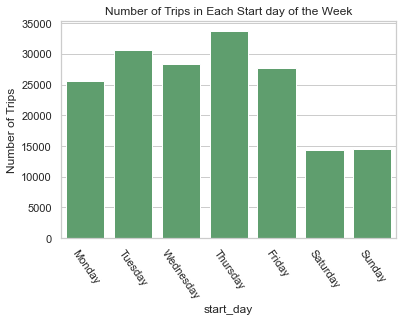

In [15]:
univariate_day('start_day', 2)
plt.title('Number of Trips in Each Start day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation = 305);

The display shows that Tuesday and Thursday have the highest number of trips in a week.
Now, I want to check if end days of the week have the same output.

# what is the number of trips in each end day of the week

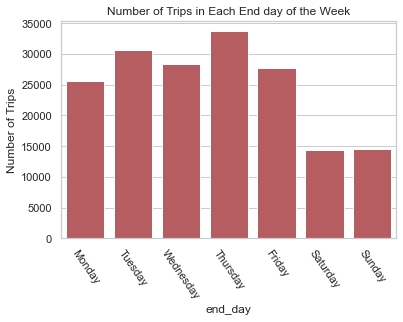

In [16]:
univariate_day('end_day', 3)
plt.title('Number of Trips in Each End day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation = 305);

The output of start day and end day of the week show the same output. 
Therefore I want to select one out of start day and end day since the outputs are the same. So, I to want rename start day to day and drop end day column from the dataset.

In [ ]:
#rename start_day to day.
ford_gobike_.rename(columns = {'start_day': 'day'}, inplace = True)

# Which day of the week has the highest number of trips

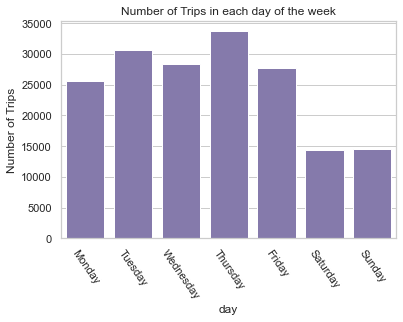

In [38]:
univariate_day('day', 4)
plt.title('Number of Trips in each day of the week')
plt.ylabel('Number of Trips')
plt.xticks(rotation = 305);

The display shows that Tuesday and Thursday have the highest number of trips in a week.
Now, I want to check how these trips change among users; subscribers and customers with respect to their genders.

# Which of the users are the major users of the system in each day of the week.

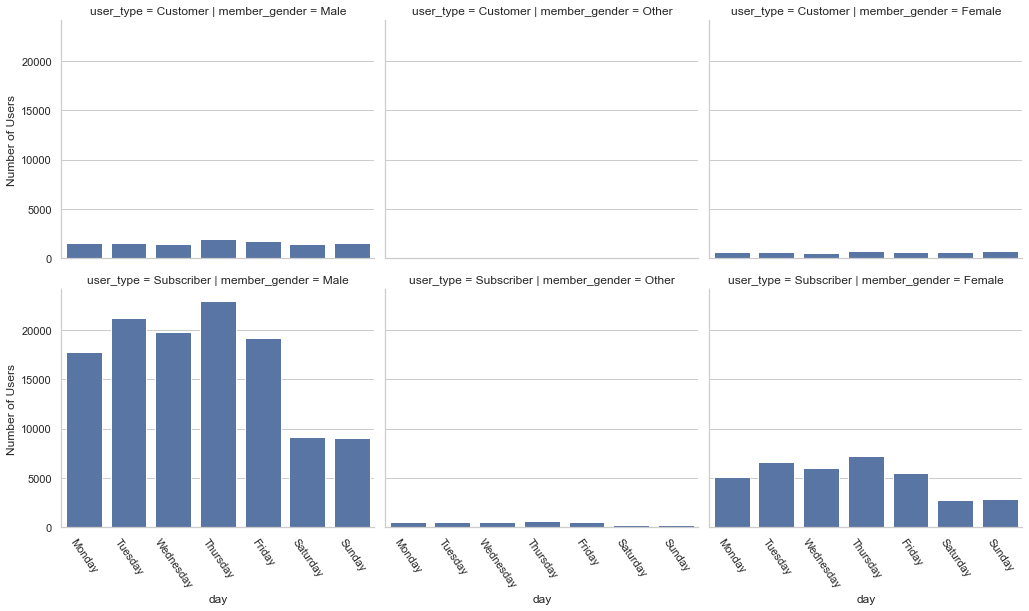

In [46]:
g = sb.FacetGrid(data = ford_gobike_, row = 'user_type', col = 'member_gender', height = 4, aspect = 1.2)
g.map(sb.countplot, 'day', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
g.set_ylabels('Number of Users')
g.set_xticklabels(rotation = 305);

For each day of the week, male subscribers are major users of the system.
So, I want to explore the age range of the users of the system.

# Which age range is the most users of the system.

for easy of understanding of the output of histogram, I would like to define the range of the bins.

In [70]:
ford_gobike_[['age', 'distance', 'time_interval_min']].describe() #want to get the min and max values of the continous variables

,age,distance,time_interval_min
count,174952.000000,174952.000000,174952.000000
mean,34.196865,1690.051472,11.733373
std,10.118731,1096.958259,27.370085
min,18.000000,0.000000,1.020000
25%,27.000000,910.447500,5.380000
50%,32.000000,1429.830000,8.500000
75%,39.000000,2224.010000,13.150000
max,141.000000,69469.340000,1409.130000


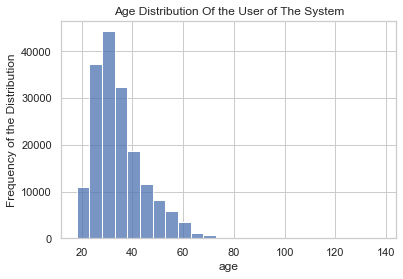

In [59]:
bins = np.arange(18, 141, 5)
sb.histplot(data = ford_gobike_, x = 'age', bins = bins)
plt.title('Age Distribution Of the User of The System')
plt.ylabel('Frequency of the Distribution');

The age range of 25 - 40 are the highest users of the system.
I want to check how this changes among subscribers and users' genders

# Which of the users has greater percentage in the age range  of 25 - 40years

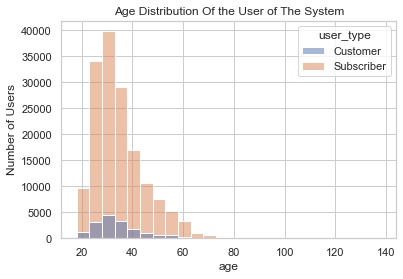

In [63]:
bins = np.arange(18, 141, 5)
sb.histplot(data = ford_gobike_, x = 'age', hue = 'user_type', bins = bins)
plt.title('Age Distribution Of the User of The System')
plt.ylabel('Number of Users');

Ofcourse, the result is expected due to greater number of subscribers in the dataset. But for further investigation, I want to check this by having separate chart for each users.

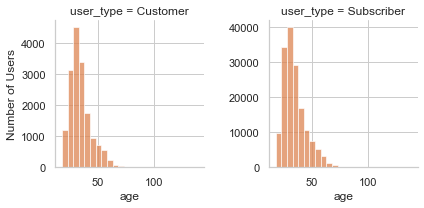

In [67]:
base_color = sb.color_palette()[1]
g = sb.FacetGrid(data = ford_gobike, col = 'user_type', sharey = False, aspect = 1)
g.map(sb.histplot, 'age', bins = bins, color = base_color)
g.set_ylabels('Number of Users');

The age range still shows the same thing. Age range of 25 - 40years is the highest users of the system for both subscribers and customers. Let's take it further by putting their genders into consideration.

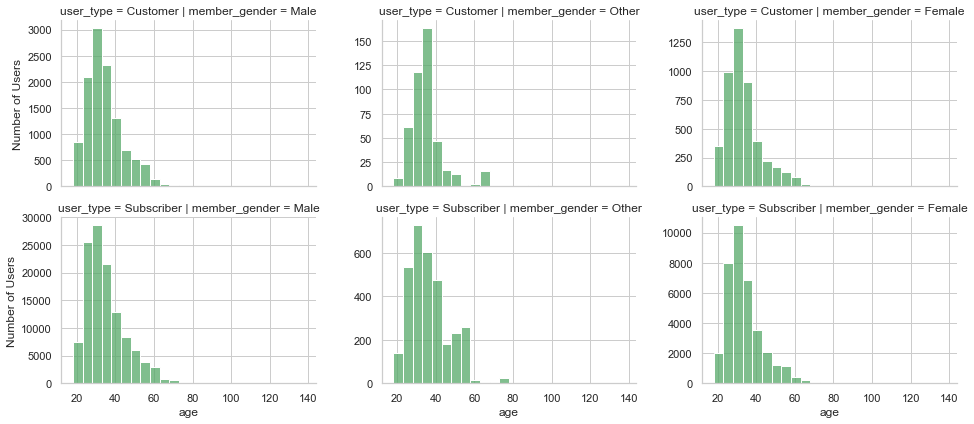

In [69]:
base_color = sb.color_palette()[2]
g = sb.FacetGrid(data = ford_gobike, row = 'user_type', col = 'member_gender',sharey = False, aspect = 1.5)
g.map(sb.histplot, 'age', bins = bins, color = base_color)
g.set_ylabels('Number of Users');

Okay,
The result is the same across users and their genders. So, users within the age range of 25 - 40years are the highest users of the system.
let's explore distance between stations and see if there would be any significant insight therein.

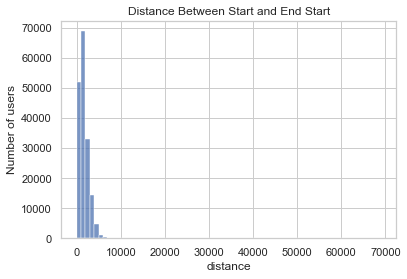

In [74]:
bins = np.arange(0, 69469.32, 1000) #let the distance run across min and max distance interval
sb.histplot(data = ford_gobike_, x = 'distance', bins = bins)
plt.title('Distance Between Start and End Start')
plt.ylabel('Number of users');

The distance is mostly within 0 and something below 10,000m.
Let's cut the distance within the interval of 0 and 10,000 for ease of understanding.

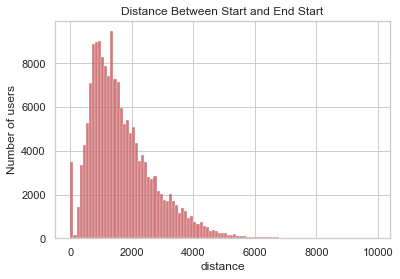

In [82]:
base_color = sb.color_palette()[3]
bins = np.arange(0, 10000, 100)
sb.histplot(data = ford_gobike_, x = 'distance', bins = bins, color = base_color)
plt.title('Distance Between Start and End Start')
plt.ylabel('Number of users');
#plt.set(xlim = (0, ));

For better understanding, let's explore the distance within 0 and 5000m since the display shows greater number of users within the interval.

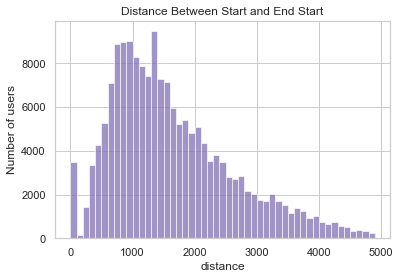

In [83]:
base_color = sb.color_palette()[4]
bins = np.arange(0, 5000, 100)
sb.histplot(data = ford_gobike_, x = 'distance', bins = bins, color = base_color)
plt.title('Distance Between Start and End Start')
plt.ylabel('Number of users');
#plt.set(xlim = (0, ));

Stations within 500m - 2000m are mostly visited by the users of the system from the display above.
Let's explore further by considering user types.

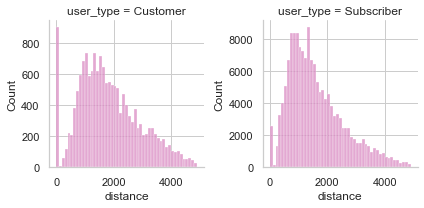

In [90]:
base_color = sb.color_palette()[6]
g = sb.FacetGrid(data = ford_gobike_, col = 'user_type', sharey = False)
g.map(sb.histplot, 'distance', bins = bins, color = base_color);

Okay.
Most users visit stations between the distance interval of 500m - 2000m.
Let's check if there is any relationship between age and distance.

# What is the relationship between distance and age.

In [108]:
from scipy.stats import pearsonr
pearsonr(ford_gobike_.distance, ford_gobike_.age)

(0.02021938726097074, 2.719541005031223e-17)

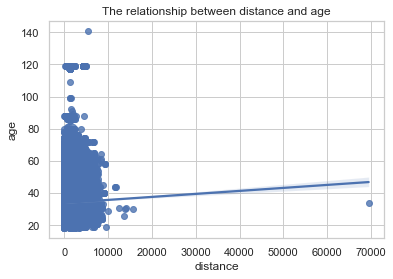

In [110]:
sb.regplot(data = ford_gobike_, x = 'distance', y = 'age')
plt.title('The relationship between distance and age');

With result of the plot, pearson corelation value and p-value as 0.02 and 2.72e-17 respectively, the relationship between distance and age isn't significant to bring any insight.
Let's explore time interval taken by users

# What time interval is mostly used by the users.

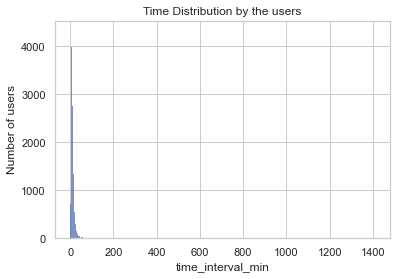

In [111]:
sb.histplot(data = ford_gobike_, x = 'time_interval_min', bins = bins)
plt.title('Time Distribution by the users')
plt.ylabel('Number of users');

the result shows that the time interval is mostly within 0 and 200. So, let's cut the plot in bins interval of 0 and 100.

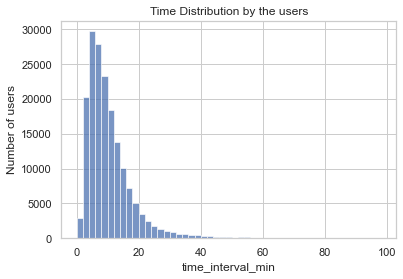

In [123]:
bins = np.arange(0, 100, 2)
sb.histplot(data = ford_gobike_, x = 'time_interval_min', bins = bins)
plt.title('Time Distribution by the users')
plt.ylabel('Number of users');

The time interval covered by most users is between 2mins - 20mins.
Let's consider each user type separately.

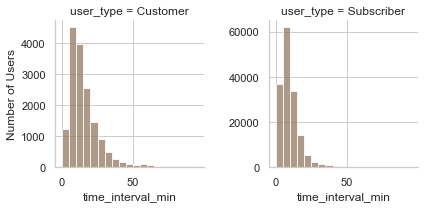

In [136]:
base_color = sb.color_palette()[5]
bins = np.arange(0, 100, 5)
g = sb.FacetGrid(data = ford_gobike_, col = 'user_type', sharey = False)
g.map(sb.histplot, 'time_interval_min', bins = bins, color = base_color)
g.set_ylabels('Number of Users');

The result seems the same. So, let's take it a bit further by considering the genders of each user type

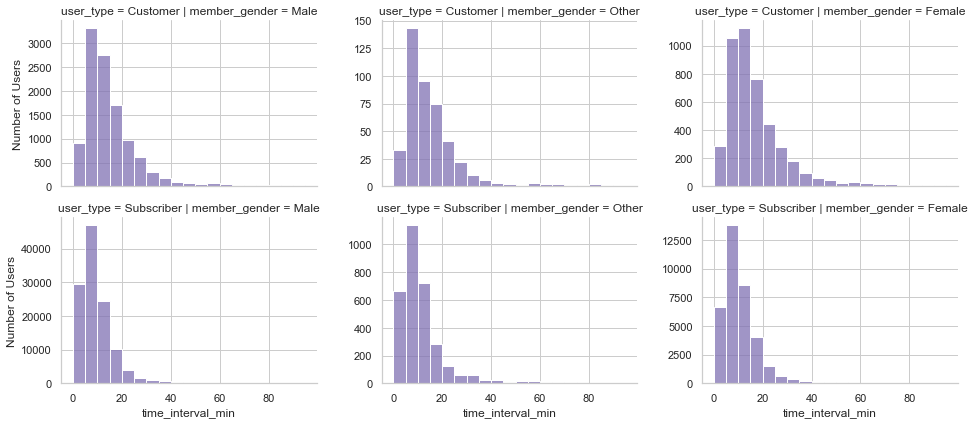

In [134]:
base_color = sb.color_palette()[4]
bins = np.arange(0, 100, 5)
g = sb.FacetGrid(data = ford_gobike_, row = 'user_type', col = 'member_gender',
                 sharey = False, aspect = 1.5)
g.map(sb.histplot, 'time_interval_min', bins = bins, color = base_color)
g.set_ylabels('Number of Users');

Finally, most users are likey to user the bike within a time interval of 2mins to 20mins. Let's check for any relationship between time interval and distance between start stations and end stations.

# Relationship between Distance and Time Interval

In [139]:
pearsonr(ford_gobike_.distance, ford_gobike_.time_interval_min)

(0.14126227091536947, 0.0)

with p value of 0, the relationship between distance and time interval is not certain. So, let's check again with regression line of regplot chart

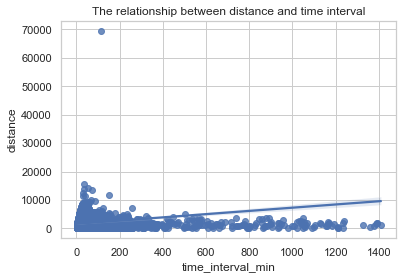

In [140]:
sb.regplot(data = ford_gobike_, y = 'distance', x = 'time_interval_min')
plt.title('The relationship between distance and time interval');

Wow...
The result still shows the same thing. Hence, there is no relationship distance and time interval.

# Conclusions

The major users of the system; bike sharing system are male subscribers within the age range of 25 - 40 years with Thursday and Tuesday being the days of the week with the highest users.

In [14]:
import numpy as np
np.histogram(ford_gobike_.age)

(array([74267, 69344, 22265,  8044,   829,   127,     4,     1,    70,
            1], dtype=int64),
 array([ 18. ,  30.3,  42.6,  54.9,  67.2,  79.5,  91.8, 104.1, 116.4,
        128.7, 141. ]))